<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the book Machine Learning for OpenCV by Michael Beyeler; the content is available [on GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [Using regression models to predict continuous outcomes](03.03-Linear-Regression.ipynb) | [Contents](../README.md) | [None](04.00-Representing-Data-and-Engineering-Features.ipynb) >

In [1]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

In [2]:
boston = datasets.load_boston()

In [3]:
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.target.shape

(506,)

### Training the model

In [6]:
ridgereg = linear_model.Ridge()

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(boston.data, boston.target,
                                                                    test_size=0.1, random_state=42)

In [8]:
ridgereg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
metrics.mean_squared_error(y_train, ridgereg.predict(X_train))

22.926424500454317

In [10]:
ridgereg.score(X_train, y_train)

0.73533535350875179

### Testing the model

In [11]:
y_pred = ridgereg.predict(X_test)

In [12]:
metrics.mean_squared_error(y_test, y_pred)

14.78588894124991

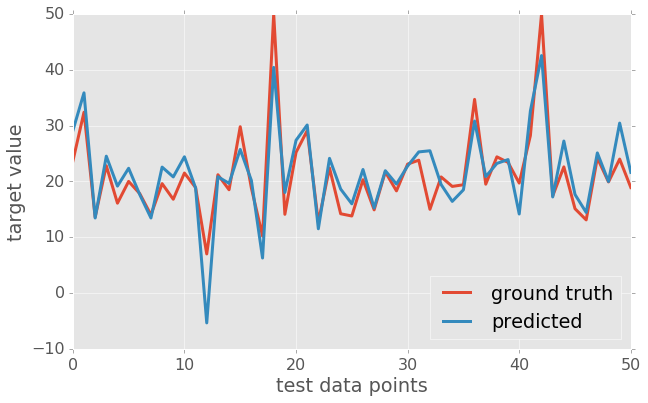

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

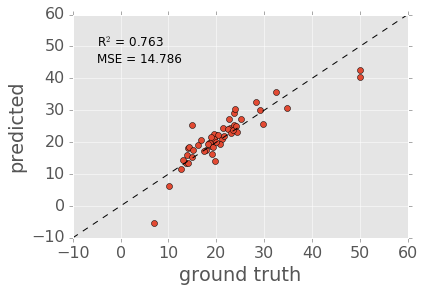

In [24]:
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % ridgereg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)

<!--NAVIGATION-->
< [Using regression models to predict continuous outcomes](03.03-Linear-Regression.ipynb) | [Contents](../README.md) | [None](04.00-Representing-Data-and-Engineering-Features.ipynb) >